# fof_number.R.dump

In [2]:
getwd()
x=c("readxl","TSA","forecast", "FinTS","e1071","fGarch")
lapply(x, require, character.only = T)
rm(list=ls())

data = read_excel("API.xlsx")

[1] "F:/git/R/0510"

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE


	Augmented Dickey-Fuller Test

data:  num
Dickey-Fuller = -1.4307, Lag order = 6, p-value = 0.8158
alternative hypothesis: stationary


Warning message in adf.test(GR_num):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  GR_num
Dickey-Fuller = -4.9254, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


Series: GR_num 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
        mean
      2.2295
s.e.  0.3628

sigma^2 estimated as 35.41:  log likelihood=-857.74
AIC=1719.49   AICc=1719.53   BIC=1726.67


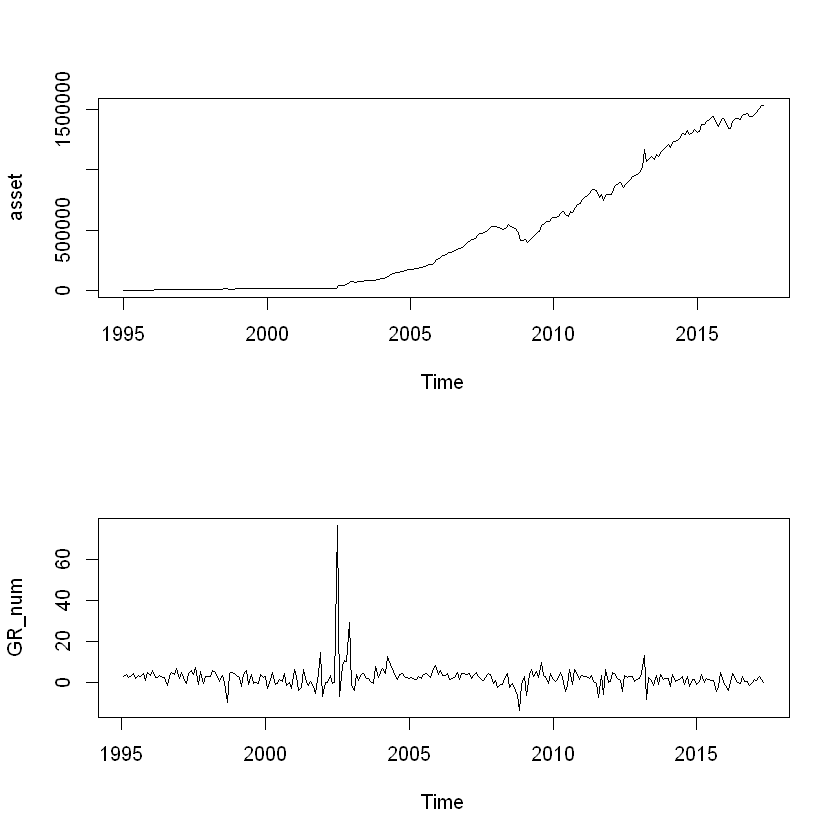

In [3]:
num = data[2] # num represents asset
num = ts(num, frequency = 12,start = c(1995,1)) # number of FOF

GR_num = diff(log(num)) # growth ratio of total net asset
GR_num = ts(GR_num * 100, frequency = 12,start = c(1995,2), names = 'GR_num')

par(mfrow = c(2,1))
plot(num)
plot(GR_num)

adf.test(num)
adf.test(GR_num)

m = auto.arima(GR_num, max.d = 0) #ARIMA(2,0,2)(1,0,2)[12]
print(m)